<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 6rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #22c1c3;">DL Project |</span> <span style="color: #08529C;">Predicting Rare Species from Images using Deep Learning</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Spring Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Diogo Duarte, 20240525</div>
            <div>Filipa Pereira, 20240509</div>
            <div>Maria Cruz, 20230760</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 1px; color: white; border-radius: 500px; text-align: center;">
</div>

## **📚 Libraries Import**

In [1]:
# !pip install visualkeras

In [2]:
# System imports
import os
import sys
import time
import datetime
from tqdm import tqdm
from typing_extensions import Self, Any      # For Python 3.10
# from typing import Self, Any               # For Python >3.11

from pathlib import Path

# Data manipulation imports
import numpy as np
import pandas as pd  
import warnings
warnings.filterwarnings("ignore")

# Data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning imports
import tensorflow as tf
from keras.ops import add
from keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling, Lambda
import visualkeras

# Evaluation imports
from keras.metrics import CategoricalAccuracy, AUC, F1Score, Precision, Recall

# Other imports
from itertools import product

# Set the style of the visualization
pd.set_option('future.no_silent_downcasting', True)   # use int instead of float in DataFrame
pd.set_option("display.max_columns", None)            # display all columns

# Disable warnings (FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Set random seed for reproducibility
np.random.seed(2025)

2025-04-11 03:33:04.949665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744338784.990998    2654 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744338785.002648    2654 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 03:33:05.066009: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print("TensorFlow Version:", tf.__version__)
print("Is TensorFlow built with CUDA?", tf.test.is_built_with_cuda())
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print("GPU Device Name:", tf.test.gpu_device_name())                                # (if error in Google Colab: Make sure your Hardware accelerator is set to GPU. 
                                                                                    # Runtime > Change runtime type > Hardware Accelerator)

TensorFlow Version: 2.18.0
Is TensorFlow built with CUDA? True
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU Device Name: /device:GPU:0


I0000 00:00:1744338788.019242    2654 gpu_device.cc:2022] Created device /device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [4]:
# # Extra: https://www.tensorflow.org/api_docs/python/tf/config/experimental/set_memory_growth
# # If you’re using a GPU, TensorFlow might pre-allocate GPU memory, leaving less for CPU operations. 
# # Enabling memory growth lets the GPU allocate only what’s needed.
# if tf.test.is_built_with_cuda():
#     gpus = tf.config.list_physical_devices('GPU')
#     if gpus:
#         tf.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
# Import custom module for importing data, visualization, and utilities
import utilities

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 1px; color: white; border-radius: 500px; text-align: center;">
</div>

## **🧮 Import Databases**

In [6]:
# # Run in Google Collab to download the dataset already splitted
# # Source: https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drivez
# # Download the file from Google Drive using wget
# !wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
#   "https://drive.usercontent.google.com/download?id=11vkRJLP-re8E-8DWaoKeSuG66u64ez0J&export=download" -O- | \
#   sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p' > /tmp/confirm.txt

# # Read the confirmation token from the temporary file
# with open('/tmp/confirm.txt', 'r') as f:
#     confirm_token = f.read().strip()

# # Download the file using the confirmation token and cookies
# !wget --load-cookies /tmp/cookies.txt \
#   "https://drive.usercontent.google.com/download?id=11vkRJLP-re8E-8DWaoKeSuG66u64ez0J&export=download&confirm={confirm_token}" \
#   -O /content/RareSpecies_Split.zip

# # Clean up temporary files
# !rm /tmp/cookies.txt /tmp/confirm.txt

# # List files in the /content directory to verify the download
# !ls -lh /content/

# # Unzip the downloaded file
# !unzip /content/RareSpecies_Split.zip -d /content/

# # List the unzipped files to verify
# !ls -lh /content/

In [7]:
# Define the path to the data
train_dir = Path("data/RareSpecies_Split/train")
val_dir = Path("data/RareSpecies_Split/val")
test_dir = Path("data/RareSpecies_Split/test")

# For Google Collab
# train_dir = Path("/content/RareSpecies_Split/train")
# val_dir = Path("/content/RareSpecies_Split/val")
# test_dir = Path("/content/RareSpecies_Split/test")

In [8]:
# Image Generators 
n_classes = 202                                     # Number of classes (we already know this based on previous notebook)
image_size = (224, 224)                             # Image size (224x224)
img_height, img_width = image_size                  # Image dimensions
batch_size = 32                                     # Batch size
input_shape = (img_height, img_width, 3)            # Input shape of the model
value_range = (0.0, 1.0)                            # Range of pixel values

In [9]:
# Get class names from directory
class_names = sorted(os.listdir(train_dir))
class_indices = {name: i for i, name in enumerate(class_names)}

# Import the image dataset from the directory
from utilities import load_images_from_directory
train_datagen, val_datagen, test_datagen = load_images_from_directory(train_dir, val_dir, test_dir,
                                                                      labels='inferred', label_mode='categorical',
                                                                      class_names=class_names, color_mode='rgb',
                                                                      batch_size=batch_size, image_size=image_size, seed=2025, 
                                                                      interpolation='bilinear', crop_to_aspect_ratio=False, pad_to_aspect_ratio=False)

print(f"\nLoaded: Train ({train_datagen.cardinality().numpy() * batch_size}), "
        f"Val ({val_datagen.cardinality().numpy() * batch_size}), "
        f"Test ({test_datagen.cardinality().numpy() * batch_size})")

Found 9586 files belonging to 202 classes.


I0000 00:00:1744338789.092330    2654 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 1198 files belonging to 202 classes.
Found 1199 files belonging to 202 classes.

Loaded: Train (9600), Val (1216), Test (1216)


In [10]:
# Check the shape of the data (batch_size, img_width, img_height, 3)
for x, y in train_datagen.take(1):
    print("Train batch shape:", x.shape, y.shape)
for x, y in val_datagen.take(1):
    print("Val batch shape:", x.shape, y.shape)
for x, y in test_datagen.take(1):
    print("Test batch shape:", x.shape, y.shape)

Train batch shape: (32, 224, 224, 3) (32, 202)


2025-04-11 03:33:11.400989: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Val batch shape: (32, 224, 224, 3) (32, 202)


2025-04-11 03:33:11.885648: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Test batch shape: (32, 224, 224, 3) (32, 202)


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #22c1c3, #27b1dd, #2d9cfd, #090979); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling - Baseline Model</b></h1></center>
</div>

<br><br>

# **💡 Modeling**

In [11]:
# Baseline Model
class RareSpeciesCNN(Model):
    """Custom CNN for rare species classification.
    
    Architecture: Simple CNN 
    Why: Small model to establish baseline, avoiding overfitting on 202 classes.
    Alternatives: Deeper CNNs (e.g., ResNet) or transfer learning (e.g., EfficientNet).
    Allows selection of preprocessing steps like grayscale, contrast, and saturation adjustment.
    """
    def __init__(self, n_classes=202, 
                 apply_grayscale=False, 
                 apply_contrast=False, contrast_factor=1.5,
                 apply_saturation=False, saturation_factor=1.5):
        """Initializes the model.
        
        Args:
            n_classes (int): Number of output classes.
            apply_grayscale (bool): If True, convert images to grayscale.
            apply_contrast (bool): If True, adjust image contrast.
            contrast_factor (float): Factor to adjust contrast by (if apply_contrast is True).
            apply_saturation (bool): If True, adjust image saturation.
            saturation_factor (float): Factor to adjust saturation by (if apply_saturation is True).
        """
        super().__init__() # Call the parent class constructor
        
        # Store preprocessing flags and factors
        self.apply_grayscale = apply_grayscale
        self.apply_contrast = apply_contrast
        self.apply_saturation = apply_saturation
        
        # --- Preprocessing Layers ---        
        # Rescaling layer (always applied)
        self.rescale_layer = Rescaling(scale= 1 / 255.0, name="Rescale_Layer")    # Rescales pixel values to [0, 1]
        
        # Conditionally define Lambda layer for contrast adjustment
        if self.apply_contrast:
            # Define Lambda layer for contrast adjustment
            # Source: https://keras.io/api/layers/core_layers/lambda/
            #         https://www.tensorflow.org/api_docs/python/tf/image/adjust_contrast
            #         contrast_factor > 1 increases contrast, < 1 decreases contrast
            self.contrast_layer = Lambda(
                lambda x: tf.image.adjust_contrast(x, contrast_factor=contrast_factor),
                name='Adjust_Contrast'
            )
        
        # Conditionally define Lambda layer for saturation adjustment
        if self.apply_saturation:
            # Define Lambda layer for saturation adjustment
            # Source: https://www.tensorflow.org/api_docs/python/tf/image/adjust_saturation
            #         saturation_factor > 1 increases saturation, < 1 decreases saturation
            self.saturation_layer = Lambda(
                lambda x: tf.image.adjust_saturation(x, saturation_factor=saturation_factor),
                name='Adjust_Saturation'
            )
            
        # Conditionally define Lambda layer for grayscale conversion
        if self.apply_grayscale:
            # Define Lambda layer for grayscale conversion
            # Source: https://www.tensorflow.org/api_docs/python/tf/image/rgb_to_grayscale
            self.grayscale_layer = Lambda(
                lambda x: tf.image.rgb_to_grayscale(x), 
                name='RGB_to_Grayscale'
            )
            # IMPORTANT: Add a Conv2D layer immediately after grayscale to ensure 
            # the number of channels is compatible with subsequent layers 
            # if they expect 3 channels. Here, we'll keep it 1 channel and adjust conv1.
            # Alternatively, convert grayscale back to 3 identical channels:
            # self.grayscale_to_rgb_layer = Lambda(
            #     lambda x: tf.image.grayscale_to_rgb(x),
            #     name='Grayscale_to_RGB'
            # )
            
            
        # --- Convolutional Layers ---
        # Adjust the first Conv layer's input channels if grayscale is applied and not converted back to RGB
        # If grayscale IS applied, the input to conv1 will have 1 channel.
        # If grayscale IS NOT applied, the input will have 3 channels (after rescaling).
        # We will handle this by checking the shape dynamically or assuming subsequent layers can handle 1 channel if needed.
        # For simplicity here, let's assume conv1 works with either 1 or 3 channels.
        # If grayscale is applied, the input depth is 1, otherwise 3.
        # A more robust way might involve explicitly setting input_shape or checking channels.
        # Let's define conv1 to work even if input is grayscale (1 channel)
        
        # Source: https://stackoverflow.com/questions/60157742/convolutional-neural-network-cnn-input-shape/61075207#61075207 (Explain Conv2D)
        self.conv1 = Conv2D(filters=3*8, kernel_size=(3, 3), activation='relu', name="Conv_Layer1", padding="same")    # 24 filters
        self.pool1 = MaxPooling2D(pool_size=(2, 2), name="Max_Pool_Layer1")                                            # Reduces spatial dimensions by half
        
        # Subsequent layers
        self.conv2l = Conv2D(filters=3*16, kernel_size=(3, 3), activation='relu', name="Conv_Layer2l", padding="same") # 48 filters
        self.conv2r = Conv2D(filters=3*16, kernel_size=(3, 3), activation='relu', name="Conv_Layer2r", padding="same") # 48 filters (parallel path example)
        # Need to combine conv2l and conv2r, e.g., by concatenation or addition before pooling
        # For simplicity, let's just use one path for now:
        self.conv2 = Conv2D(filters=3*16, kernel_size=(3, 3), activation='relu', name="Conv_Layer2", padding="same") # 48 filters
        self.pool2 = MaxPooling2D(pool_size=(2, 2), name="MaxPool_Layer2")                                            # Further reduces spatial dimensions

        # --- Classification Head ---
        self.flatten = Flatten(name="Flatten_Layer")                                  # Flattens the output for the dense layer
        self.dropout = Dropout(0.5, name="Dropout_Layer")                             # Applies dropout regularization
        self.dense = Dense(n_classes, activation='softmax', name="Output_Layer")      # Outputs probabilities for n_classes

    def call(self, inputs, training=False):
        """Defines the forward pass of the model.
        
        Args:
            inputs: Input tensor (batch of images).
            training (bool): Indicates if the model is in training mode (for Dropout).
            
        Returns:
            Output tensor (probabilities for each class).
        """
        # Apply mandatory rescaling
        x = self.rescale_layer(inputs)
        
        # Apply conditional preprocessing layers
        if self.apply_contrast:
            x = self.contrast_layer(x)
        if self.apply_saturation:
            x = self.saturation_layer(x)
        if self.apply_grayscale:
            x = self.grayscale_layer(x)
            # If subsequent layers strictly require 3 channels, uncomment this:
            # x = self.grayscale_to_rgb_layer(x) 
            # Note: If grayscale is applied, conv1 will process a 1-channel input unless converted back.

        # Pass through convolutional blocks
        x = self.conv1(x)
        x = self.pool1(x)
        
        # Using the simplified single path for conv2
        x = self.conv2(x) 
        
        # If using parallel conv2l and conv2r, you would need to combine them here, e.g.:
        left_path = self.conv2l(x)
        right_path = self.conv2r(x)
        x = tf.keras.layers.concatenate([left_path, right_path], axis=-1) # Combine features
        
        x = self.pool2(x)

        # Flatten and pass through the classification head
        x = self.flatten(x)
        # Apply dropout only during training
        x = self.dropout(x, training=training) 
        outputs = self.dense(x)
        
        return outputs

# Example Instantiation and Summary
model = RareSpeciesCNN(
    n_classes=n_classes, 
    apply_grayscale=True, 
    apply_contrast=False,                         
    apply_saturation=False
)

# Build the model by providing an input shape
inputs = Input(shape=(img_width, img_height, 3))        # Input shape
_ = model.call(inputs)                                  # Call the model to build it
model.summary()                                         # Print the model summary

Model: "rare_species_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Rescale_Layer (Rescaling)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ RGB_to_Grayscale (Lambda)       │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer1 (Conv2D)            │ (None, 224, 224, 24)   │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pool_Layer1 (MaxPooling2D)  │ (None, 112, 112, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer2l (Conv2D)           │ (None, 112, 112, 48)   │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer2r (Conv2D)           │ (None, 112, 112, 48)   │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_Layer2 (Conv2D)            │ (None, 112, 112, 48)   │        10,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_Layer2 (MaxPooling2D)   │ (None, 56, 56, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten_Layer (Flatten)         │ (None, 301056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer (Dropout)         │ (None, 301056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 202)            │    60,813,514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,865,738 (232.18 MB)

 Trainable params: 60,865,738 (232.18 MB)

 Non-trainable params: 0 (0.00 B)

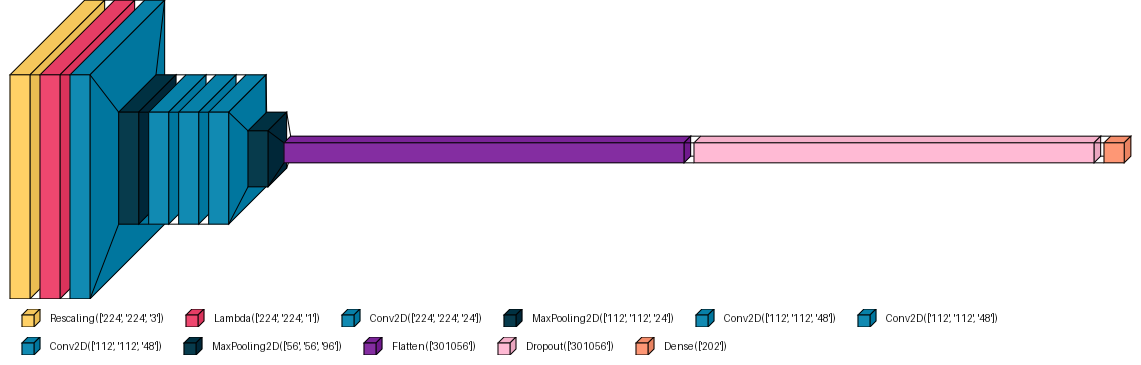

In [12]:
# Visualize the model architecture
# Source: https://www.kaggle.com/code/devsubhash/visualize-deep-learning-models-using-visualkeras
visualkeras.layered_view(model, 
                         legend=True, 
                         show_dimension=True,
                         scale_xy=1,                                        # Adjust the scale of the image
                        #  scale_z=1,
                         # to_file='./BaselineModel_Architecture.png',
).show()

In [13]:
# Compile model
# optimizer = SGD(learning_rate=0.1, name="Optimizer")                                                       # SGD with decay for stability
optimizer = Adam(learning_rate=0.001, name="Optimizer")                                                   # Adam for faster convergence
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False, name="Optimizer")  # Adam 

loss = CategoricalCrossentropy(name="Loss")                            # Suitable for multi-class one-hot labels
metrics = [CategoricalAccuracy(name="accuracy"), 
           Precision(name="precision"),
           Recall(name="recall"), 
           F1Score(average="macro", name="f1_score"),
           AUC(name="auc")]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [14]:
# Create a directory for saving the model and logs
model_name = f"RareSpeciesCNN_{datetime.datetime.now().strftime('%Y%m%d')}"                                                                             # Model name 
print(f"\n\033[1mModel name:\033[0m {model_name}")


Model name: RareSpeciesCNN_20250411


In [15]:
# Callbacks
# Create a directory for saving the model and logs
os.makedirs("./ModelCallbacks", exist_ok=True)      # Create directory if it doesn't exist
model_name = f"RareSpeciesCNN_{datetime.datetime.now().strftime('%Y%m%d')}"                                                                             # Model name 
callbacks = [
    ModelCheckpoint(f"./ModelCallbacks/checkpoint_{model_name}.keras", monitor="val_loss", save_best_only=True, verbose=0),       # Save best model
    CSVLogger(f"./ModelCallbacks/metrics_{model_name}.csv"),                                                                      # Log training metrics
    LearningRateScheduler(lambda epoch, lr: lr * 0.95),                                                                           # Exponential decay for learning rate
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)                                                                      # Stop training when the validation loss stops improving
]

---

### **Original Data**

In [16]:
print(f"\n\033[1mBatch size:\033[0m {batch_size}")


Batch size: 32


In [17]:
# Train model
start_time = time.time()
history = model.fit(train_datagen, batch_size = batch_size, epochs=5, validation_data=val_datagen, callbacks=callbacks, verbose=2)
train_time = round(time.time() - start_time, 2)

print(f"\nTraining completed in \033[1m{train_time} seconds ({str(datetime.timedelta(seconds=train_time))} h)\033[0m).")

Epoch 1/5


I0000 00:00:1744338795.791832    2791 service.cc:148] XLA service 0x7aafdc002c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744338795.793277    2791 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-11 03:33:16.902282: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744338797.430478    2791 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-11 03:33:19.403535: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1023', 28 bytes spill stores, 28 bytes spill loads

2025-04-11 03:33:19.528053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_904'

300/300 - 62s - 207ms/step - accuracy: 0.0563 - auc: 0.6784 - f1_score: 0.0099 - loss: 5.0438 - precision: 0.2632 - recall: 0.0026 - val_accuracy: 0.0568 - val_auc: 0.7061 - val_f1_score: 0.0150 - val_loss: 4.8423 - val_precision: 0.5000 - val_recall: 0.0042 - learning_rate: 9.5000e-04
Epoch 2/5
300/300 - 29s - 97ms/step - accuracy: 0.2602 - auc: 0.8711 - f1_score: 0.2668 - loss: 3.5339 - precision: 0.7790 - recall: 0.1213 - val_accuracy: 0.1135 - val_auc: 0.6972 - val_f1_score: 0.0670 - val_loss: 6.1077 - val_precision: 0.2910 - val_recall: 0.0593 - learning_rate: 9.0250e-04
Epoch 3/5
300/300 - 29s - 96ms/step - accuracy: 0.7353 - auc: 0.9753 - f1_score: 0.7843 - loss: 1.2180 - precision: 0.9374 - recall: 0.6245 - val_accuracy: 0.1302 - val_auc: 0.6572 - val_f1_score: 0.0874 - val_loss: 10.1338 - val_precision: 0.2010 - val_recall: 0.1002 - learning_rate: 8.5737e-04
Epoch 4/5
300/300 - 32s - 107ms/step - accuracy: 0.8807 - auc: 0.9914 - f1_score: 0.9053 - loss: 0.5451 - precision: 0.9

#### **🧪 Model Selection & 📏 Model Evaluation**

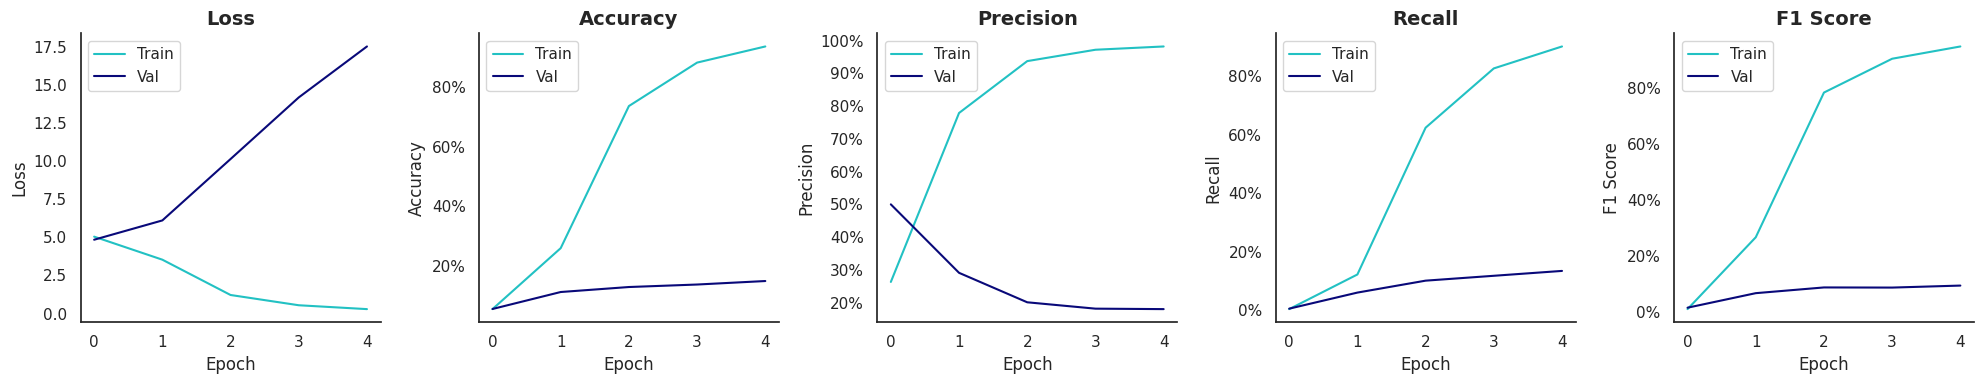

In [18]:
# Evaluate model
from utilities import plot_metrics

os.makedirs("./ModelsEvaluation", exist_ok=True)      # Create directory if it doesn't exist
plot_metrics(history, file_path=f"./ModelsEvaluation/2_Training_Validation_Metrics_{datetime.datetime.now().strftime('%Y%m%d')}.png")

In [19]:
# Evaluate on validation and test sets
train_results = {'accuracy': history.history['accuracy'][-1], 'precision': history.history['precision'][-1], 'recall': history.history['recall'][-1], 'f1_score': history.history['f1_score'][-1], 'auc': history.history['auc'][-1]}
val_results = model.evaluate(val_datagen, batch_size=batch_size, return_dict=True, verbose=0)
test_results = model.evaluate(test_datagen, batch_size=batch_size, return_dict=True, verbose=0)

In [20]:
# Display results
from utilities import display_side_by_side, create_evaluation_dataframe

results_df = create_evaluation_dataframe(
    model_name="Baseline Model",
    variation="Default",
    train_metrics=train_results,
    val_metrics=val_results,
    test_metrics=test_results,
    train_time=train_time
)

display_side_by_side(results_df, super_title="Model Evaluation Results")

Model Evaluation Results 
 
 
 
 
 
 Train 
 Validation 
 Test 
 
 
 
 
 Time of Execution 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 Accuracy 
 Precision 
 Recall 
 F1 Score 
 AUROC 
 
 
 Model 
 Variation 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Baseline Model 
 Default 
 188.16 
 0.9346 
 0.9821 
 0.9029 
 0.9491 
 0.9958 
 0.1503 
 0.1802 
 0.1336 
 0.0941 
 0.6249 
 0.1451 
 0.1779 
 0.1276 
 0.0928 
 0.6268

---

## **📊 Best Model - Predictions Analysis**

In [ ]:
from utilities import plot_confusion_matrix

# Plot confusion matrix for test set
plot_confusion_matrix(
    y_true=test_datagen.classes,
    y_pred=model.predict(test_datagen, batch_size=batch_size),
    title="Confusion Matrix | Best Baseline Model",
    # file_path="./ModelsEvaluation/3_Test_Confusion_Matrix.png"
)

In [ ]:
# Plot 5 right and 5 wrong predictions
from utilities import plot_predictions
plot_predictions(
    model=model,
    data=test_datagen,
    n_samples=5,
    file_path=None
)

In [ ]:
# # Save to CSV
# results_df.set_index('Models', inplace=True)
# results_df.to_csv("ModelsEvaluation/BaselineModelEvaluation_1_29.03.2025.csv", index=False)                ### Change the name of the file to save it

---

---

# **🔗 Bibliography/References**

**[[1]](https://)** AAAAAAAAAA

---